In [85]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
 

import json
import gspread
from oauth2client.client import SignedJwtAssertionCredentials

json_key = json.load(open('./costfish-3a4d1968df8f.json'))
scope = ['https://spreadsheets.google.com/feeds']

credentials = SignedJwtAssertionCredentials(json_key['client_email'], json_key['private_key'], scope)

gc = gspread.authorize(credentials)

wks = gc.open('costfish')
sheet = wks.sheet1
list_of_lists = sheet.get_all_values()

import pandas as pd

columns_name=['Date','牛','羊','豬','雞','魚','貝','蟹','軟絲','高麗菜','空心菜','絲瓜','南瓜','西瓜','柳丁','鳯梨','百合','蓮子','紅棗']
df = pd.DataFrame(list_of_lists[1:],columns=columns_name,dtype=float)
nparray = df.as_matrix()
rows , columns = nparray.shape

lastPriceList = nparray[rows-1][1:]
last2ThPriceList =nparray[rows-2][1:]

priceChangeList = lastPriceList - last2ThPriceList
priceChPercent = priceChangeList / last2ThPriceList


kpiindex=[]
for index , change in enumerate(priceChPercent) :
    if change > 0.05 : 
        print columns_name[index + 1] , change





羊 0.0909090909091
豬 0.666666666667


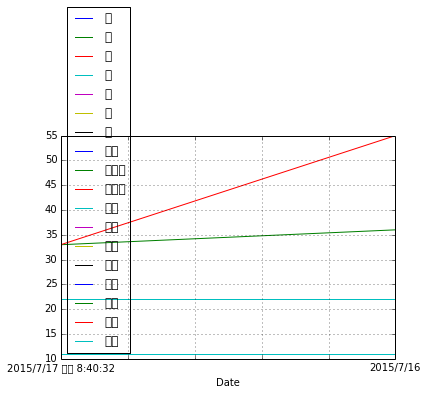

In [84]:
df.p lot(kind='line', x='Date')